In [1]:
import mxnet as mx

In [2]:
import gluoncv as gcv

In [3]:
import matplotlib.pyplot as plt

In [4]:
#image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_url = 'https://images.pexels.com/photos/4019410/pexels-photo-4019410.jpeg'

In [5]:
image_path = 'truck-on-road.jpg'

In [6]:
gcv.utils.download(image_url,image_path) # Download Image

'truck-on-road.jpg'

In [7]:
image = mx.image.imread(image_path)

In [8]:
print('Shape: ', image.shape) # N W H C arragement. N for number of batches  W for width H for height C for channels
print('DataType: ', image.dtype)
print('Min. Value: ', image.min().asscalar() )
print('Max. Value: ', image.max().asscalar())

Shape:  (4051, 6240, 3)
DataType:  <class 'numpy.uint8'>
Min. Value:  0
Max. Value:  253


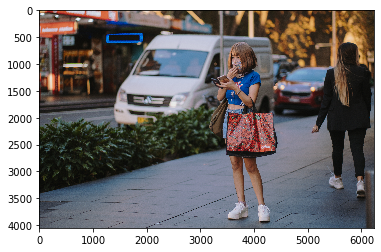

In [9]:
plt.imshow(image.asnumpy())

In [10]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512) # Reducing dimensions of image and converting UINT8 to FLOAT32

In [11]:
print('Shape: ', image.shape) # N C H W format
print('DataType: ', image.dtype)
print('Min. Value: ', image.min().asscalar() )
print('Max. Value: ', image.max().asscalar())

Shape:  (1, 3, 512, 789)
DataType:  <class 'numpy.float32'>
Min. Value:  -2.117904
Max. Value:  2.5179958


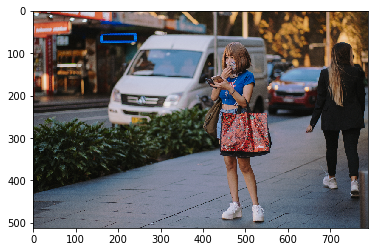

In [12]:
plt.imshow(chw_image)

In [13]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True) #Downloading model from GluonCV Zoo

In [14]:
prediction = network(image)

In [15]:
type(prediction)

tuple

In [16]:
for array in prediction:
    print('shape: {}'.format(array.shape))  # label + probability + bounding box values

shape: (1, 100, 1)
shape: (1, 100, 1)
shape: (1, 100, 4)


In [17]:
predicted = []
for array in prediction:
    predicted.append(array[0])

In [18]:
class_indices, probabilities, bounding_box = predicted

In [19]:
# k is the top values
k = 10
print(class_indices[:k])


[[ 0.]
 [ 2.]
 [ 0.]
 [26.]
 [26.]
 [ 7.]
 [67.]
 [ 2.]
 [ 0.]
 [67.]]
<NDArray 10x1 @cpu(0)>


In [20]:
print(probabilities[:k])


[[0.9971441 ]
 [0.9749741 ]
 [0.844049  ]
 [0.779028  ]
 [0.7143846 ]
 [0.6437233 ]
 [0.60992384]
 [0.4102531 ]
 [0.40749016]
 [0.32953927]]
<NDArray 10x1 @cpu(0)>


In [21]:
print(bounding_box[:k])


[[637.73175   76.49768  786.18195  444.7793  ]
 [552.04846  127.691246 682.68054  245.61404 ]
 [403.06677   67.72963  546.14075  493.3531  ]
 [420.9786   175.20004  560.77295  364.4943  ]
 [399.00433  200.31453  443.41687  300.3614  ]
 [171.661     47.013374 561.8598   261.18658 ]
 [419.61996  154.30972  448.41678  171.15036 ]
 [170.79651   48.440872 561.7472   280.11475 ]
 [238.82297   99.70956  286.6879   145.55501 ]
 [405.93698  159.94687  437.26675  179.72488 ]]
<NDArray 10x4 @cpu(0)>


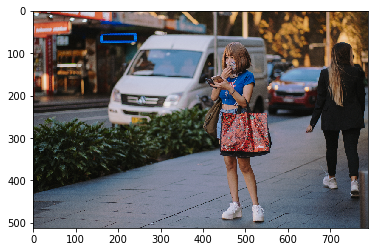

In [22]:
plt.imshow(chw_image)

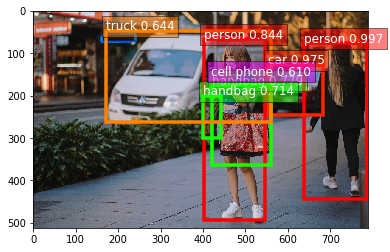

In [23]:
gcv.utils.viz.plot_bbox(chw_image,bounding_box,probabilities,class_indices,class_names=network.classes)